In [2]:
# Import libraries we need
import pandas as pd          # For data handling
import matplotlib.pyplot as plt   # For charts
import seaborn as sns        # For prettier charts

In [4]:
plt.style.use('ggplot')

In [5]:
# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Look at first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Check missing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [10]:
# Count how many Movies vs TV Shows
type_counts = df['type'].value_counts()
display(type_counts)

,count
type,
Movie,6131
TV Show,2676


/tmp/ipython-input-3147930105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="pastel")


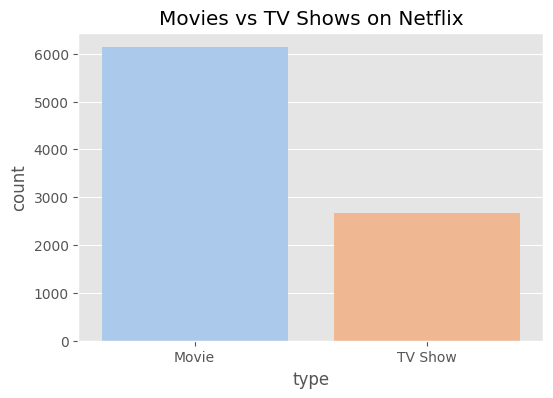

In [9]:
# Count how many Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, palette="pastel")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

/tmp/ipython-input-3481401081.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Genre", data=genre_count, palette="viridis")


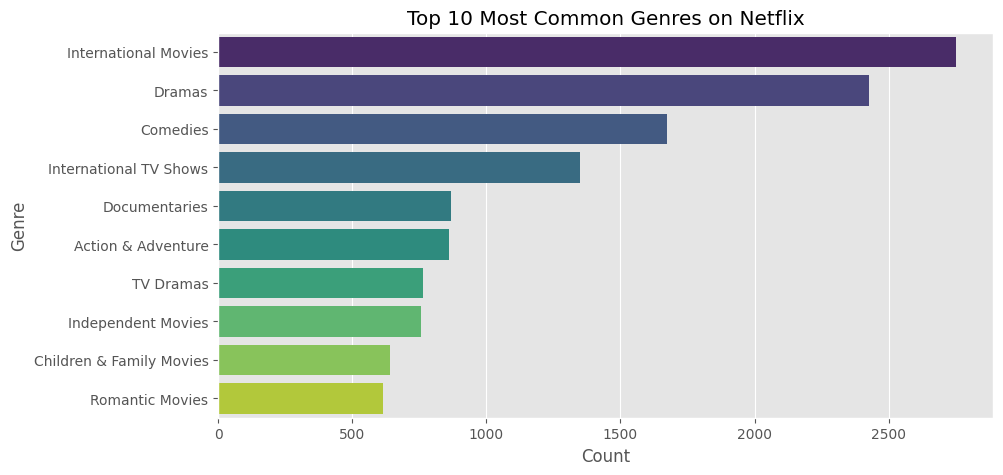

In [11]:
# 'listed_in' has multiple genres, let’s count the top ones
from collections import Counter

genres = []
for g in df['listed_in'].dropna():
    for i in g.split(', '):
        genres.append(i)

genre_count = pd.DataFrame(Counter(genres).most_common(10), columns=['Genre','Count'])

plt.figure(figsize=(10,5))
sns.barplot(x="Count", y="Genre", data=genre_count, palette="viridis")
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()

/tmp/ipython-input-2155067142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="release_year", data=df, palette="mako", order=sorted(df['release_year'].unique()))


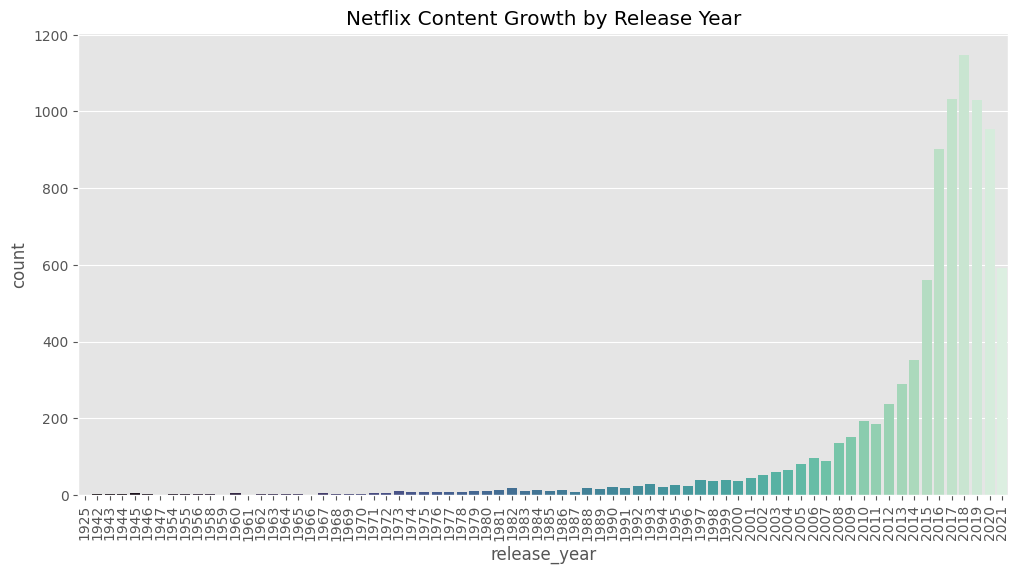

In [12]:
# Count how many shows/movies released each year
plt.figure(figsize=(12,6))
sns.countplot(x="release_year", data=df, palette="mako", order=sorted(df['release_year'].unique()))
plt.xticks(rotation=90)
plt.title("Netflix Content Growth by Release Year")
plt.show()


/tmp/ipython-input-4262642077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix")


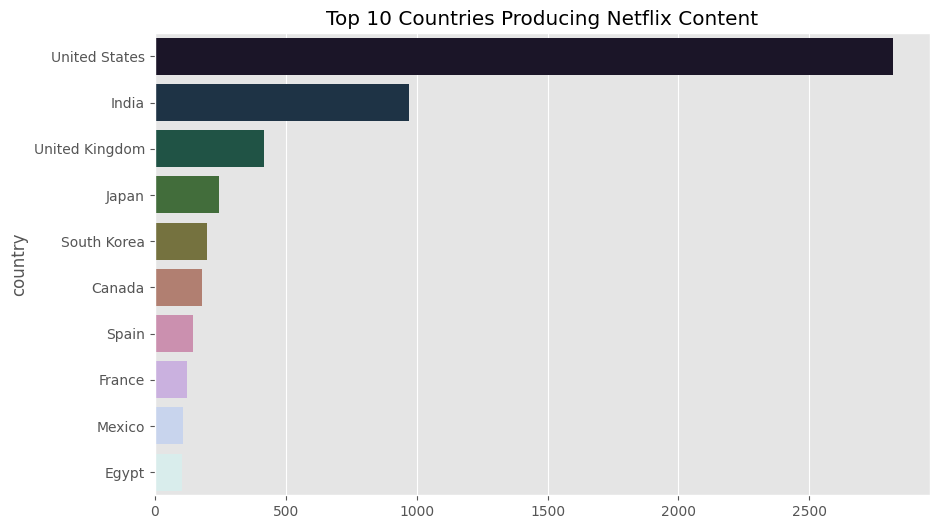

In [13]:
# Check top 10 producing countries
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix")
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()